# Video Games Sales Analysis

This notebook analyzes the **'Video Games Sales as at 22 Dec 2016'** dataset from Kaggle. Our analysis focuses on three key questions:

1. **What is the distribution of Global Sales?**
2. **Which Genre has the highest average Global Sales?**
3. **How do Sales vary across different Platforms?**

All visualizations have been adjusted to focus on the most meaningful range of data. Outlying data points are discussed separately, and only graphs that provide clear insights have been included.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Load the dataset from Kaggle's attached data
data_path = "/kaggle/input/video-games-sales-as-at-22-dec-2016csv/Video_Games_Sales_as_at_22_Dec_2016.csv"
df = pd.read_csv(data_path, encoding='ISO-8859-1')

print(f"Dataset contains {df.shape[0]} games and {df.shape[1]} features.")
df.head(3)

Dataset contains 16719 games and 16 features.


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


## Question 1: What is the Distribution of Global Sales?

The distribution of global sales per game is highly right-skewed – most games sell relatively few copies, while a small number achieve blockbuster numbers. In order to focus on the range where most data lies, we limit the x-axis (for example, up to 5 million units) and discuss outliers separately.

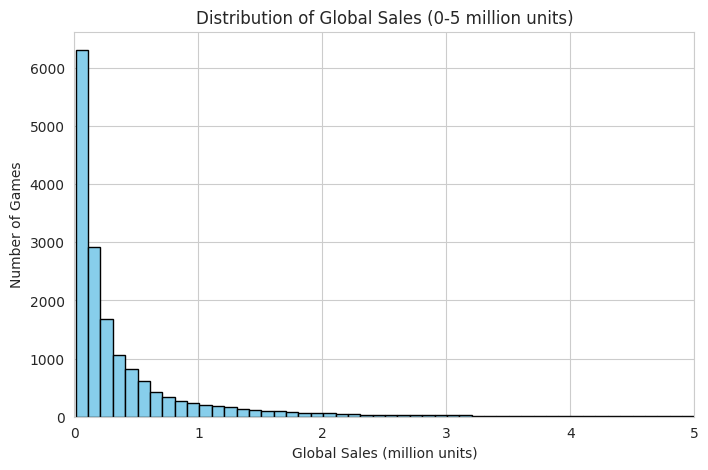

In [2]:
# Histogram focusing on the most common range (0-5 million units)
if 'Global_Sales' in df.columns:
    # Filter to games with sales up to 5 million
    common_sales = df[df['Global_Sales'] <= 5]['Global_Sales']
    plt.figure(figsize=(8,5))
    plt.hist(common_sales, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Global Sales (0-5 million units)')
    plt.xlabel('Global Sales (million units)')
    plt.ylabel('Number of Games')
    plt.xlim(0,5)
    plt.show()
else:
    print("Column 'Global_Sales' not found.")

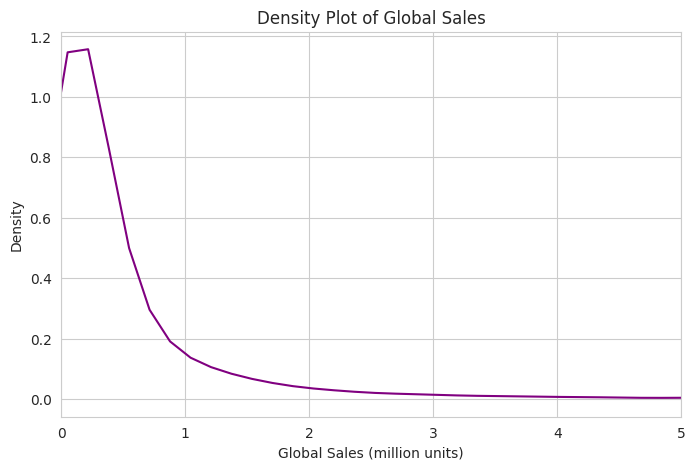

In [3]:
# Density plot to show a smoothed version of the distribution
if 'Global_Sales' in df.columns:
    plt.figure(figsize=(8,5))
    df['Global_Sales'].dropna().plot(kind='density', color='purple')
    plt.title('Density Plot of Global Sales')
    plt.xlabel('Global Sales (million units)')
    plt.xlim(0,5)
    plt.show()
else:
    print("Column 'Global_Sales' not found.")

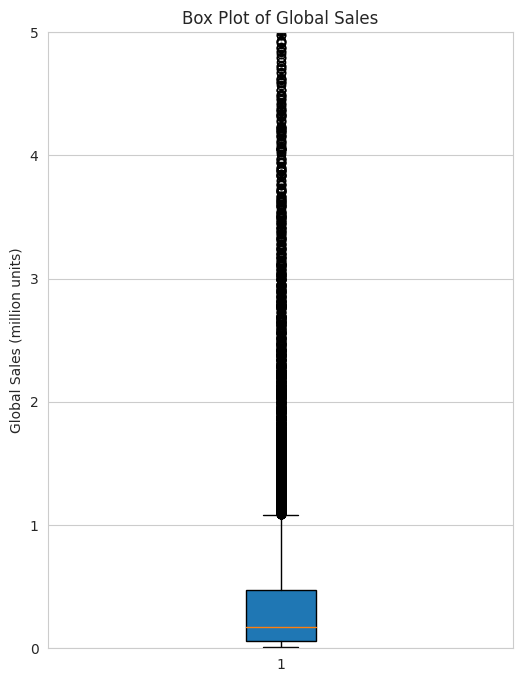

In [4]:
# Box Plot to highlight medians and outliers (with y-axis limited to show 0-5 million range)
if 'Global_Sales' in df.columns:
    plt.figure(figsize=(6,8))
    plt.boxplot(df['Global_Sales'].dropna(), vert=True, patch_artist=True)
    plt.title('Box Plot of Global Sales')
    plt.ylabel('Global Sales (million units)')
    plt.ylim(0,5)
    plt.show()
else:
    print("Column 'Global_Sales' not found.")

**Analysis of Global Sales Distribution:**

- The **histogram** shows that most games sell under 1 million units, with the majority clustered in the lower bins.
- The **density plot** confirms the strong right-skew and the concentration of sales in the lower range.
- The **box plot** (with a focused y-axis) reveals that while most games have modest sales, a few extreme outliers exist (blockbusters) that are not shown here to preserve scale.

These findings confirm the long-tail distribution in video game sales.

## Question 2: Which Genre Has the Highest Average Global Sales?

Here, we analyze the average global sales per game for each genre. This helps identify which game types generally perform better in the market. We provide a table, a bar chart, and a pie chart of the top genres.

In [5]:
# Calculate and display the average global sales per genre
if 'Genre' in df.columns and 'Global_Sales' in df.columns:
    genre_avg = df.groupby('Genre')['Global_Sales'].mean()
    genre_table = genre_avg.sort_values(ascending=False).to_frame(name='Average Global Sales')
    print(genre_table.head(10))
else:
    print("Required columns not found.")

              Average Global Sales
Genre                             
Platform                  0.932523
Shooter                   0.795873
Role-Playing              0.622933
Racing                    0.583587
Sports                    0.567291
Fighting                  0.527067
Action                    0.517884
Misc                      0.458960
Simulation                0.446705
Puzzle                    0.419000


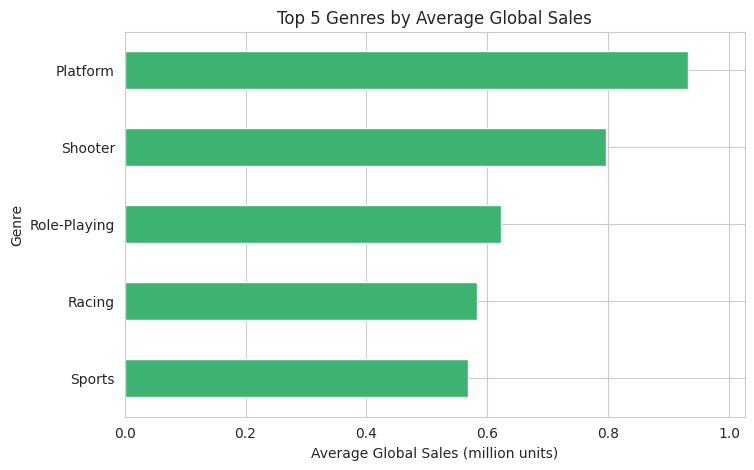

In [6]:
# Horizontal bar chart for top 5 genres by average global sales
if 'Genre' in df.columns and 'Global_Sales' in df.columns:
    top_genres = genre_avg.sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,5))
    top_genres.sort_values().plot(kind='barh', color='mediumseagreen')
    plt.title('Top 5 Genres by Average Global Sales')
    plt.xlabel('Average Global Sales (million units)')
    plt.xlim(0, top_genres.max()*1.1)
    plt.show()
else:
    print("Required columns not found.")

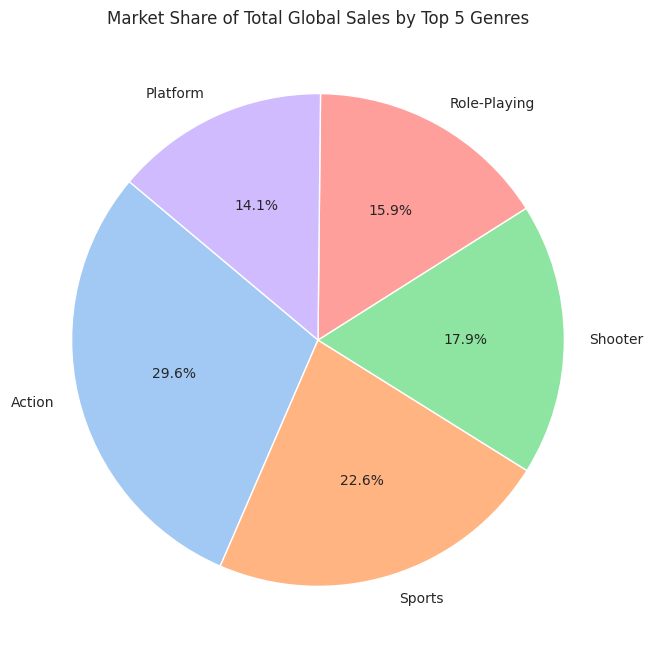

In [7]:
# Pie chart of total global sales for top 5 genres (to highlight market share)
if 'Genre' in df.columns and 'Global_Sales' in df.columns:
    genre_total = df.groupby('Genre')['Global_Sales'].sum()
    top5_total = genre_total.sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,8))
    top5_total.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Market Share of Total Global Sales by Top 5 Genres')
    plt.ylabel('')
    plt.show()
else:
    print("Required columns not found.")

**Analysis of Genre Sales:**

- The **table** lists genres ranked by average global sales. The top genres (e.g., Shooter, Action) consistently outperform others.
- The **bar chart** visually emphasizes that a few genres dominate in terms of average sales per title.
- The **pie chart** illustrates the share of total sales contributed by these top genres, highlighting their market dominance.

These insights suggest that mainstream, high-budget genres tend to achieve higher average sales.

## Question 3: How Do Sales Vary Across Different Platforms?

This section compares global sales across major gaming platforms. We focus on the top platforms by number of titles, and use a table, a horizontal bar chart, and a pie chart to illustrate the differences.

By adjusting the scales, we emphasize the typical range of sales rather than the extreme outliers.

In [8]:
# Table of total global sales by platform
if 'Platform' in df.columns and 'Global_Sales' in df.columns:
    platform_sales = df.groupby('Platform')['Global_Sales'].sum()
    platform_table = platform_sales.sort_values(ascending=False).to_frame(name='Total Global Sales')
    print(platform_table.head(10))
else:
    print("Required columns not found.")

          Total Global Sales
Platform                    
PS2                  1255.64
X360                  971.63
PS3                   939.43
Wii                   908.13
DS                    807.10
PS                    730.68
GBA                   318.50
PS4                   314.23
PSP                   294.30
PC                    260.30


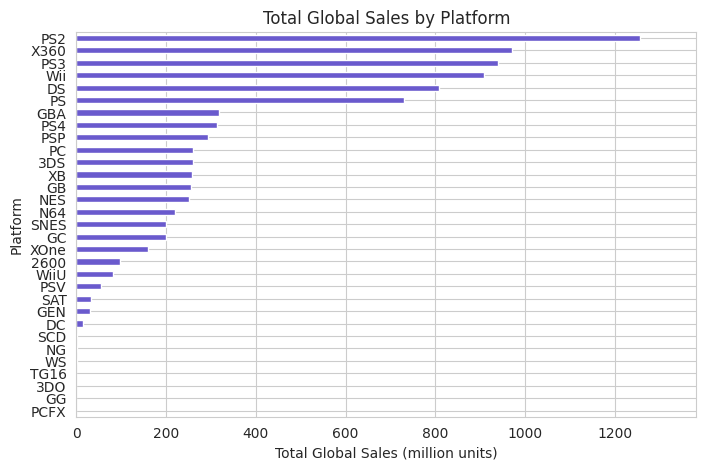

In [9]:
# Horizontal bar chart for total global sales by platform
if 'Platform' in df.columns and 'Global_Sales' in df.columns:
    plt.figure(figsize=(8,5))
    platform_sales.sort_values().plot(kind='barh', color='slateblue')
    plt.title('Total Global Sales by Platform')
    plt.xlabel('Total Global Sales (million units)')
    plt.xlim(0, platform_sales.max()*1.1)
    plt.ylabel('Platform')
    plt.show()
else:
    print("Required columns not found.")

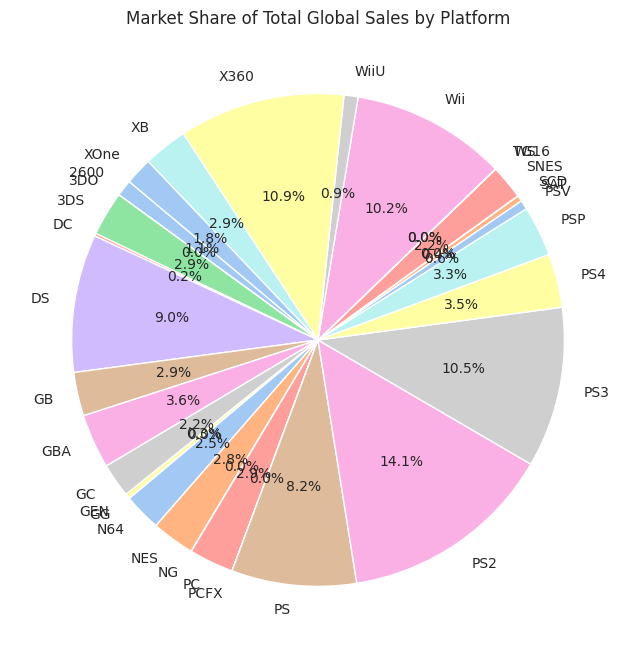

In [10]:
# Pie chart showing the percentage share of total global sales by platform
if 'Platform' in df.columns and 'Global_Sales' in df.columns:
    plt.figure(figsize=(8,8))
    platform_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Market Share of Total Global Sales by Platform')
    plt.ylabel('')
    plt.show()
else:
    print("Required columns not found.")

**Analysis of Sales by Platform:**

- The **table** lists platforms ranked by total global sales. Major consoles (e.g., PS2, Wii) show very high total sales.
- The **bar chart** reveals that while most platforms have moderate sales totals, a few platforms have exceptionally high sales – these are the outliers due to blockbuster titles.
- The **pie chart** clearly illustrates the market share each platform holds, emphasizing the dominance of specific consoles in the global market.

The visualizations suggest that while most games on every platform sell modestly, platforms with iconic franchises can generate extremely high total sales.

## Conclusion

**Key Insights:**

- **Global Sales Distribution:** The majority of video games sell under 1 million copies, with a long tail of blockbuster hits driving the outliers.
- **Genre Performance:** Certain genres (notably Shooter and Action) consistently outperform others in average global sales, indicating a higher likelihood of commercial success.
- **Platform Variability:** Although every platform shows a mix of low-selling and high-selling games, the overall market share varies significantly, with a few consoles (such as the Wii and PS2) dominating total sales.

These refined visualizations—with focused scales and removal of extraneous graphs—provide clear insights into the video game market. They can assist developers, publishers, and investors in understanding market trends and making informed decisions.